# Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
aq = pd.read_csv("aqdata.csv", encoding='cp1252')
aq.tail(5)
#Date from 1987-2015

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
aq.shape

(435742, 13)

In [4]:
# Extracting Tamil Nadu state data alone
tn = aq.query('state=="Tamil Nadu" ')
tn.sample(2)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
355133,72,27/04/2012,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,Industrial Area,14.0,25.0,47.0,NaN,"Thiruvottiyur, Chennai",NaN,2012-04-27
350607,NaN,15/2/2008,Tamil Nadu,Thoothukudi,NaN,Residential and others,51.5,12.6,37.0,100.0,AVM Jewellery Bldg.,NaN,2008-02-15


In [5]:
tn.shape

(20597, 13)

In [6]:
tn.describe(include = 'all')

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
count,14539.0,20597,20597,20597,14133,20243,19906.000000,19981.000000,18792.000000,9530.000000,18961,454.000000,20597
unique,48.0,3559,1,11,4,6,NaN,NaN,NaN,NaN,49,NaN,3559
top,309.0,28-02-13,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN,"Sowdeswari College Building, Salem",NaN,2013-02-28
freq,811.0,17,20597,6646,11498,9033,NaN,NaN,NaN,NaN,772,NaN,17
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.315134,21.601202,66.585638,126.729064,NaN,29.550441,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,9.790730,11.034707,44.450037,81.060905,NaN,16.783704,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,3.000000,0.000000,NaN,4.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,15.300000,39.500000,76.000000,NaN,18.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,20.600000,55.000000,108.000000,NaN,25.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,25.100000,82.000000,156.875000,NaN,36.000000,NaN


# Feature Engineering

##### Removing unnecessary datas

In [7]:
tn.drop(labels=['stn_code','sampling_date','agency','location_monitoring_station'], axis = 1, inplace = True)
tn.sample(2)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
346937,Tamil Nadu,Coimbatore,Industrial Areas,23.8,48.9,99.0,281.0,NaN,2006-01-27
354100,Tamil Nadu,Coimbatore,"Residential, Rural and other Areas",4.0,25.0,52.0,NaN,NaN,2011-12-26


In [8]:
tn.isnull().sum()

state           0
location        0
type          354
so2           691
no2           616
rspm         1805
spm         11067
pm2_5       20143
date            0
dtype: int64

pm2_5 has  almost 97% data missing. So omitting pm2_5 column

In [9]:
tn.drop(labels = ['pm2_5'], axis =1, inplace = True)
tn.head(2)

,state,location,type,so2,no2,rspm,spm,date
343639,Tamil Nadu,Madras,Industrial,0.5,0.3,NaN,82.0,1987-01-27
343640,Tamil Nadu,Madras,Industrial,12.9,1.3,NaN,290.0,1987-04-13


In order to fill the missing values, the values are first need to be sorted in Chronological order

In [10]:
tn.dtypes

state        object
location     object
type         object
so2         float64
no2         float64
rspm        float64
spm         float64
date         object
dtype: object

In [11]:
# To sort based on dates, the date should be of "datetime" datatype. So converting "object" data type to "datetime" datatype

In [12]:
tn['date'] = pd.to_datetime(tn.date,format='%Y-%m-%d')
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20597 entries, 343639 to 364235
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     20597 non-null  object        
 1   location  20597 non-null  object        
 2   type      20243 non-null  object        
 3   so2       19906 non-null  float64       
 4   no2       19981 non-null  float64       
 5   rspm      18792 non-null  float64       
 6   spm       9530 non-null   float64       
 7   date      20597 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.4+ MB


In [13]:
tn.sort_values(by='date')

,state,location,type,so2,no2,rspm,spm,date
343641,Tamil Nadu,Madras,Industrial,38.8,0.9,NaN,222.0,1987-01-05
343642,Tamil Nadu,Madras,Industrial,29.7,1.1,NaN,213.0,1987-01-06
343643,Tamil Nadu,Madras,Industrial,27.5,1.3,NaN,223.0,1987-01-07
343656,Tamil Nadu,Madras,Residential,4.0,1.0,NaN,116.0,1987-01-12
343655,Tamil Nadu,Madras,Residential,8.3,0.8,NaN,121.0,1987-01-12
...,...,...,...,...,...,...,...,...
363476,Tamil Nadu,Cuddalore,"Residential, Rural and other Areas",12.0,18.0,53.0,NaN,2015-12-31
363989,Tamil Nadu,Chennai,"Residential, Rural and other Areas",10.0,14.0,123.0,NaN,2015-12-31
362831,Tamil Nadu,Madurai,"Residential, Rural and other Areas",9.0,23.0,58.0,NaN,2015-12-31
362605,Tamil Nadu,Coimbatore,"Residential, Rural and other Areas",4.0,27.0,88.0,NaN,2015-12-31


In [14]:
tn['so2'].fillna(method='ffill',inplace = True);
tn['no2'].fillna(method='ffill',inplace = True);
tn['rspm'].fillna(method='ffill',inplace = True);
tn['spm'].fillna(method='ffill',inplace = True);

In [15]:
tn.isnull().sum()

state          0
location       0
type         354
so2            0
no2            0
rspm        1636
spm            0
date           0
dtype: int64

In [16]:
tn.iloc[[1634]]

,state,location,type,so2,no2,rspm,spm,date
345273,Tamil Nadu,Madurai,Industrial Area,8.3,19.6,NaN,33.0,2002-11-01


In [17]:
# Even after replacement, we have 1636 missing values in rspm
print(tn.iloc[[1634]],tn.iloc[[1635]],tn.iloc[[1636]],tn.iloc[[1636]])

             state location             type  so2   no2  rspm   spm       date
345273  Tamil Nadu  Madurai  Industrial Area  8.3  19.6   NaN  33.0 2002-11-01              state location             type   so2   no2  rspm   spm  \
345274  Tamil Nadu  Madurai  Industrial Area  10.7  29.6   NaN  63.0   

             date  
345274 2002-12-01                state location                                type  so2    no2  \
345275  Tamil Nadu  Chennai  Residential, Rural and other Areas  6.0  12.75   

         rspm     spm       date  
345275  56.33  101.33 2004-02-01                state location                                type  so2    no2  \
345275  Tamil Nadu  Chennai  Residential, Rural and other Areas  6.0  12.75   

         rspm     spm       date  
345275  56.33  101.33 2004-02-01  


In [18]:
# This means rspm has not been calculated till 2002. It has been measured only from 2004 onwards.
# We can either omit it or seperate the data set into two. That is before 2004 and after 2004.
# Here for simplicity, I am deleting the column of rspm

In [19]:
tn.drop(labels = ['rspm'], axis = 1, inplace = True)
tn.head()

,state,location,type,so2,no2,spm,date
343639,Tamil Nadu,Madras,Industrial,0.5,0.3,82.0,1987-01-27
343640,Tamil Nadu,Madras,Industrial,12.9,1.3,290.0,1987-04-13
343641,Tamil Nadu,Madras,Industrial,38.8,0.9,222.0,1987-01-05
343642,Tamil Nadu,Madras,Industrial,29.7,1.1,213.0,1987-01-06
343643,Tamil Nadu,Madras,Industrial,27.5,1.3,223.0,1987-01-07


In [20]:
tn.isnull().sum()

state         0
location      0
type        354
so2           0
no2           0
spm           0
date          0
dtype: int64

In [21]:
# Dealing with 354 missing values of type

[Text(0, 0, 'Industrial'),
 Text(1, 0, 'Residential'),
 Text(2, 0, 'Industrial Area'),
 Text(3, 0, 'Residential, Rural and other Areas'),
 Text(4, 0, 'Industrial Areas'),
 Text(5, 0, 'Residential and others')]

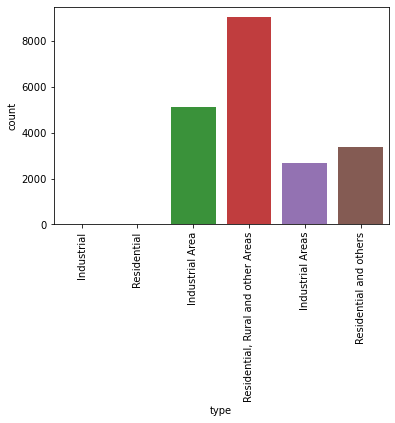

In [22]:
typ=sns.countplot(x ="type",data = tn)
typ.set_xticklabels(typ.get_xticklabels(), rotation=90)

Here we have repetition of types, so replacing all to unique types

In [23]:
tn['type'].replace("Industrial Areas","Industrial",inplace=True)
tn['type'].replace("Industrial Area","Industrial",inplace=True)
tn['type'].replace("Residential and others","Residential",inplace=True)
tn['type'].replace("Residential, Rural and other Areas","Residential",inplace=True)

[Text(0, 0, 'Industrial'), Text(1, 0, 'Residential')]

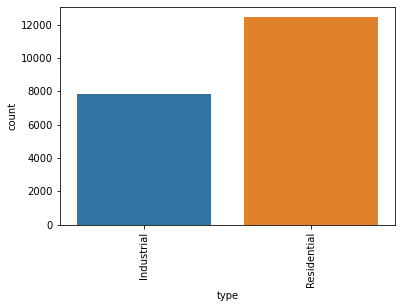

In [24]:
typ=sns.countplot(x ="type",data = tn)
typ.set_xticklabels(typ.get_xticklabels(), rotation=90)

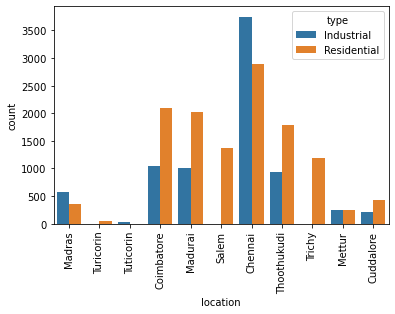

In [25]:
datacount_ty =sns.countplot(x ="location",hue = 'type',data = tn);
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [26]:
# Rows with missing "types"
null_data = tn[tn.isnull().any(axis=1)]
null_data.head(20)

,state,location,type,so2,no2,spm,date
343962,Tamil Nadu,Tuticorin,NaN,10.2,16.7,194.0,1991-09-01
343984,Tamil Nadu,Tuticorin,NaN,7.2,16.4,82.0,1991-12-01
343985,Tamil Nadu,Tuticorin,NaN,8.2,5.4,47.0,1991-12-01
343986,Tamil Nadu,Tuticorin,NaN,8.0,12.4,44.0,1991-12-01
344142,Tamil Nadu,Tuticorin,NaN,3.7,17.8,80.0,1994-09-01
344143,Tamil Nadu,Tuticorin,NaN,6.4,20.9,68.0,1994-09-01
344147,Tamil Nadu,Tuticorin,NaN,3.7,17.8,80.0,1994-09-01
344148,Tamil Nadu,Tuticorin,NaN,6.4,20.9,68.0,1994-09-01
344155,Tamil Nadu,Coimbatore,NaN,6.0,16.0,55.0,1995-01-01
344156,Tamil Nadu,Coimbatore,NaN,0.9,9.2,44.0,1995-03-01


Mode is higher for residential. So filling the missing 354 values in type by "Residential" type

In [27]:
# Converting NaN to zeros
#df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)
tn['type'] = tn['type'].replace(np.nan, "Residential")

In [28]:
tn.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
spm         0
date        0
dtype: int64

In [29]:
#Finding hidden missing values. (i.e. zeros)

In [30]:
aaa = (tn == 0).astype(int).sum(axis=0)
print(aaa)

state        0
location     0
type         0
so2         16
no2          1
spm         66
date         0
dtype: int64


In [31]:
# Also we can see the "locations" repeated.
# Madras - Chennai, # Turicorin-Tuticorin
# Replacing them into single value

In [32]:
tn['location'].replace("Turicorin","Tuticorin",inplace=True)
tn['location'].replace("Madras","Chennai",inplace=True)

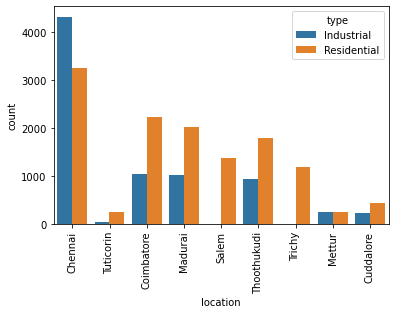

In [33]:
datacount_ty =sns.countplot(x ="location",hue = 'type',data = tn);
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [34]:
tn.head()

,state,location,type,so2,no2,spm,date
343639,Tamil Nadu,Chennai,Industrial,0.5,0.3,82.0,1987-01-27
343640,Tamil Nadu,Chennai,Industrial,12.9,1.3,290.0,1987-04-13
343641,Tamil Nadu,Chennai,Industrial,38.8,0.9,222.0,1987-01-05
343642,Tamil Nadu,Chennai,Industrial,29.7,1.1,213.0,1987-01-06
343643,Tamil Nadu,Chennai,Industrial,27.5,1.3,223.0,1987-01-07


# Data Visualization

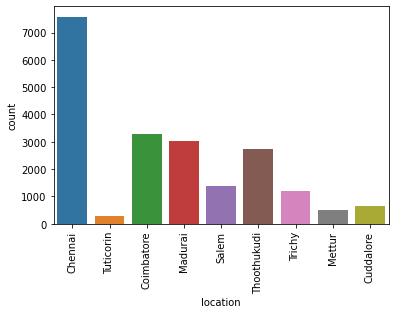

In [35]:
datacount =sns.countplot(x ="location",data = tn);
datacount.set_xticklabels(datacount.get_xticklabels(), rotation=90);

In [36]:
loc = pd.pivot_table(tn, values=['so2','no2','spm'],index='location') # Aggfunc: default-np.mean()
loc

,no2,so2,spm
location,,,
Chennai,18.551330,11.905157,199.767056
Coimbatore,29.374767,5.832845,188.888683
Cuddalore,19.772657,9.110599,267.000000
Madurai,24.420616,11.153280,179.156298
Mettur,24.039095,8.399177,267.000000
Salem,25.764407,8.190645,179.440385
Thoothukudi,16.948928,17.532772,210.858009
Trichy,18.211327,13.753170,267.000000
Tuticorin,14.505208,10.176389,51.322917


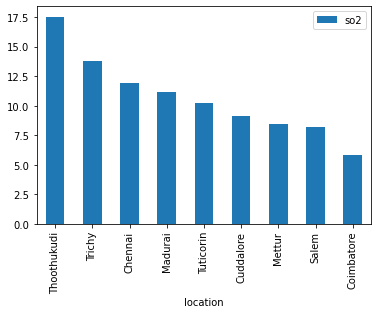

In [37]:
maxso2 = loc.sort_values(by='so2',ascending=False)
maxso2.loc[:,['so2']].head(10).plot(kind='bar');


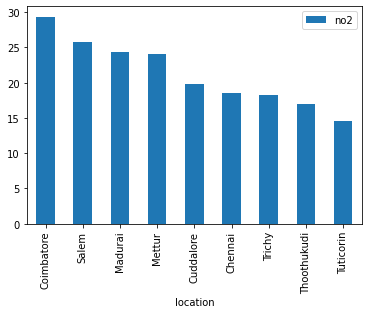

In [38]:
maxno2 = loc.sort_values(by='no2',ascending=False);
maxno2.loc[:,['no2']].head(10).plot(kind='bar');

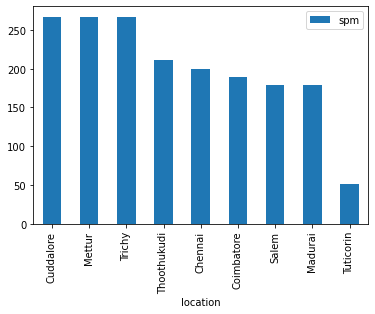

In [39]:
maxspm = loc.sort_values(by='spm',ascending=False);
maxspm.loc[:,['spm']].head(10).plot(kind='bar');

# Calculating AQI

In [40]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= "s1"
    if (so2>40 and so2<=80):
     si= "s2"
    if (so2>80 and so2<=380):
     si= "s3"
    if (so2>380 and so2<=800):
     si= "s4"
    if (so2>800 and so2<=1600):
     si= "s5"
    if (so2>1600):
     si= "s6"
    return si
tn['si']=tn['so2'].apply(calculate_si)
ds= tn[['so2','si']]
ds.tail()

,so2,si
364231,13.0,s1
364232,13.0,s1
364233,14.0,s1
364234,15.0,s1
364235,15.0,s1


In [41]:
def calculate_ni(no2):
    ni=0
    if (no2<=40):
     ni= "n1"
    if (no2>40 and no2<=80):
     ni= "n2"
    if (no2>80 and no2<=180):
     ni= "n3"
    if (no2>180 and no2<=280):
     ni= "n4"
    if (no2>280 and no2<=400):
     ni= "n5"
    if (no2>400):
     ni= "n6"
    return ni
tn['ni']=tn['no2'].apply(calculate_ni)
dn= tn[['no2','ni']]
dn.tail()

,no2,ni
364231,22.0,n1
364232,22.0,n1
364233,24.0,n1
364234,25.0,n1
364235,24.0,n1


In [42]:
def calculate_spi(spm):
    spi=0
    if (spm<=40):
      spi= "sp1"
    if (spm>40 and spm<=80):
      spi= "sp2"
    if (spm>80 and spm<=180):
      spi= "sp3"
    if (spm>180 and spm<=280):
      spi= "sp4"
    if (spm>280 and spm<=400):
      spi= "sp5"
    if (spm>400):
      spi= "sp6"
    return  spi
tn['spi']=tn['spm'].apply(calculate_spi)
dsp= tn[['spm','spi']]
dsp.tail()

,spm,spi
364231,267.0,sp4
364232,267.0,sp4
364233,267.0,sp4
364234,267.0,sp4
364235,267.0,sp4


In [43]:
tn.sample(2)

,state,location,type,so2,no2,spm,date,si,ni,spi
343921,Tamil Nadu,Chennai,Industrial,12.2,19.9,264.0,1991-05-01,s1,n1,sp4
354824,Tamil Nadu,Thoothukudi,Residential,8.0,11.0,267.0,2011-01-20,s1,n1,sp4


In [44]:
# AQI
def calculate_aqi(si,ni,spi):
    aqi=0
    if(si>ni and si>spi):
     aqi=si
    if (spi>ni and spi>si):
     aqi=spi
    if(ni>si and ni>spi):
     aqi= ni
    return aqi
tn['AQI']=tn.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm']),axis=1)

In [45]:
tn.head()

,state,location,type,so2,no2,spm,date,si,ni,spi,AQI
343639,Tamil Nadu,Chennai,Industrial,0.5,0.3,82.0,1987-01-27,s1,n1,sp3,82.0
343640,Tamil Nadu,Chennai,Industrial,12.9,1.3,290.0,1987-04-13,s1,n1,sp5,290.0
343641,Tamil Nadu,Chennai,Industrial,38.8,0.9,222.0,1987-01-05,s1,n1,sp4,222.0
343642,Tamil Nadu,Chennai,Industrial,29.7,1.1,213.0,1987-01-06,s1,n1,sp4,213.0
343643,Tamil Nadu,Chennai,Industrial,27.5,1.3,223.0,1987-01-07,s1,n1,sp4,223.0


In [46]:
aq_wise = pd.pivot_table(tn, values=['AQI'],index='location')
aq_wise

,AQI
location,
Chennai,200.055794
Coimbatore,189.199613
Cuddalore,267.000000
Madurai,179.283224
Mettur,267.000000
Salem,179.550399
Thoothukudi,210.887068
Trichy,267.000000
Tuticorin,52.573958


<AxesSubplot:xlabel='location'>

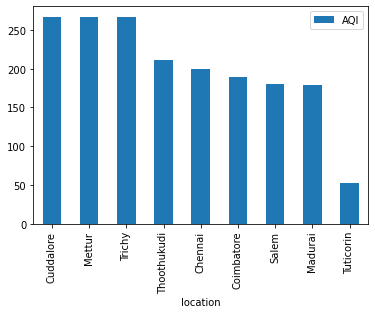

In [47]:
maxaqi = aq_wise.sort_values(by='AQI',ascending=False)
maxaqi.loc[:,['AQI']].head(37).plot(kind='bar')

In [48]:
date_wise = pd.pivot_table(tn, values=['AQI'],index='date')
date_wise

,AQI
date,
1987-01-05,222.0
1987-01-06,213.0
1987-01-07,223.0
1987-01-12,118.5
1987-01-27,82.0
...,...
2015-12-26,267.0
2015-12-28,267.0
2015-12-29,267.0


<AxesSubplot:xlabel='date'>

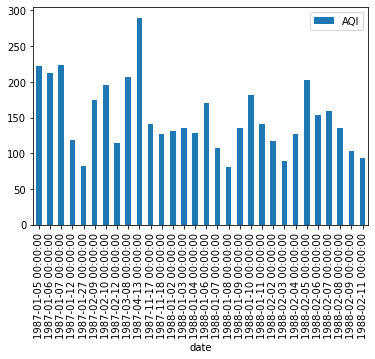

In [49]:
date_wise.loc[:,['AQI']].head(30).plot(kind='bar')

# Training Data

In [50]:
dum1 = pd.get_dummies(tn['type'])
dum2 = pd.get_dummies(tn['location'])
tn['year'] = tn['date'].dt.year

In [51]:
td = pd.concat([tn, dum1, dum2], axis = 1)
td.head()

,state,location,type,so2,no2,spm,date,si,ni,spi,...,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
343639,Tamil Nadu,Chennai,Industrial,0.5,0.3,82.0,1987-01-27,s1,n1,sp3,...,0,1,0,0,0,0,0,0,0,0
343640,Tamil Nadu,Chennai,Industrial,12.9,1.3,290.0,1987-04-13,s1,n1,sp5,...,0,1,0,0,0,0,0,0,0,0
343641,Tamil Nadu,Chennai,Industrial,38.8,0.9,222.0,1987-01-05,s1,n1,sp4,...,0,1,0,0,0,0,0,0,0,0
343642,Tamil Nadu,Chennai,Industrial,29.7,1.1,213.0,1987-01-06,s1,n1,sp4,...,0,1,0,0,0,0,0,0,0,0
343643,Tamil Nadu,Chennai,Industrial,27.5,1.3,223.0,1987-01-07,s1,n1,sp4,...,0,1,0,0,0,0,0,0,0,0


In [52]:
td.drop(labels = ['state','location','type','so2','no2','spm','si','ni','spi','date'], axis = 1, inplace = True)
td.sample(2)

,AQI,year,Industrial,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
345360,35.0,2004,0,1,1,0,0,0,0,0,0,0,0
351832,142.0,2009,0,1,0,0,0,0,0,0,1,0,0


In [53]:
td.corr()

,AQI,year,Industrial,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
AQI,1.000000,0.646473,0.057981,-0.057981,-0.006406,-0.056296,0.133554,-0.099989,0.114920,-0.063568,0.043930,0.182486,-0.197143
year,0.646473,1.000000,-0.085917,0.085917,-0.123071,-0.056847,0.158258,0.011918,0.138348,0.015006,0.047736,0.186706,-0.307805
Industrial,0.057981,-0.085917,1.000000,-1.000000,0.300520,-0.054400,-0.017697,-0.038487,0.038661,-0.209332,-0.027929,-0.192979,-0.064122
Residential,-0.057981,0.085917,-1.000000,1.000000,-0.300520,0.054400,0.017697,0.038487,-0.038661,0.209332,0.027929,0.192979,0.064122
Chennai,-0.006406,-0.123071,0.300520,-0.300520,1.000000,-0.331489,-0.137904,-0.317511,-0.118663,-0.204397,-0.297876,-0.188430,-0.090901
Coimbatore,-0.056296,-0.056847,-0.054400,0.054400,-0.331489,1.000000,-0.078454,-0.180633,-0.067508,-0.116282,-0.169463,-0.107199,-0.051714
Cuddalore,0.133554,0.158258,-0.017697,0.017697,-0.137904,-0.078454,1.000000,-0.075146,-0.028084,-0.048375,-0.070499,-0.044596,-0.021514
Madurai,-0.099989,0.011918,-0.038487,0.038487,-0.317511,-0.180633,-0.075146,1.000000,-0.064661,-0.111379,-0.162317,-0.102678,-0.049533
Mettur,0.114920,0.138348,0.038661,-0.038661,-0.118663,-0.067508,-0.028084,-0.064661,1.000000,-0.041626,-0.060663,-0.038374,-0.018512
Salem,-0.063568,0.015006,-0.209332,0.209332,-0.204397,-0.116282,-0.048375,-0.111379,-0.041626,1.000000,-0.104491,-0.066099,-0.031887


"year" has good correlation with "AQI" when compared to others

<AxesSubplot:xlabel='year'>

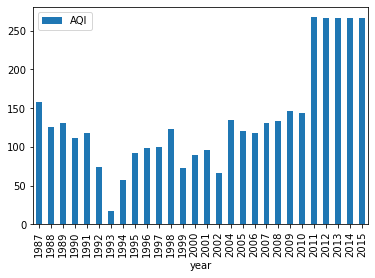

In [54]:
yr_wise = pd.pivot_table(td, values=['AQI'],index='year')
yr_wise.loc[:,['AQI']].head(30).plot(kind='bar')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X=td.drop("AQI",axis=1)
y=td["AQI"]

In [57]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=25)

# Model fittings

### Simple Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

LinearRegression()

In [60]:
lin_mod.score(X_train, y_train )

0.44536015005067575

In [61]:
lin_mod.score(X_test, y_test)

0.4674066110791505

In [62]:
# Less Score. Underfitting

### Polynomial Regression 

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

In [64]:
print(poly_clf.score(X_train2, y_train))

0.5105880112206782


In [65]:
print(poly_clf.score(X_test2, y_test))

0.5323421001846418


In [66]:
# Trying with higher degrees

In [67]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.4860537926261391
0.49428024267837467


In [68]:
# Reduced scores than degree = 2

In [69]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.5102209409439443
0.530387659490118


In [70]:
# Nearly score to degree = 2. But still less than degree = 2

In [71]:
poly = PolynomialFeatures(degree=5, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.506501741701051
0.5303706868228454


In [72]:
# Score reduces as degree increases

In [73]:
poly = PolynomialFeatures(degree=6, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.506501741701051
0.5303706868228454


In [74]:
# Same score as prev degree. 
#Underfitting

### K-Nearest Neighbour

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [76]:
XScaled = X.apply(zscore)

In [77]:
NNH = KNeighborsRegressor(n_neighbors = 27, metric = 'euclidean')

In [78]:
NNH.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=27)

In [79]:
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7239080609538029
0.7706168194875633


Score Better than Linear Regression models. Trying with different n_neighbours

In [80]:
NNH = KNeighborsRegressor(n_neighbors = 30) # default metric = 'minkowski'
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.723809498088116
0.7719586808848092


In [81]:
NNH = KNeighborsRegressor(n_neighbors = 55)
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7251509518338644
0.7705163784261739


In [82]:
NNH = KNeighborsRegressor(n_neighbors = 70)
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7240609430015734
0.7685054030238094


In [83]:
# if we increase n_neigbours more than 55, train fitting increases but test fit decreases. So 55 is the optimum one

In [84]:
NNH = KNeighborsRegressor(n_neighbors = 55, metric = 'euclidean')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7251509518338644
0.7705163784261739


In [85]:
# Better result dan "minskowki"

In [86]:
NNH = KNeighborsRegressor(n_neighbors = 35, metric = 'euclidean')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7235162915287796
0.7722764205003013


In [87]:
NNH = KNeighborsRegressor(n_neighbors = 30, metric = 'euclidean')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.723809498088116
0.7719586808848092


35 is the optimum one

In [88]:
NNH = KNeighborsRegressor(n_neighbors = 35, metric = 'manhattan')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7238308231819853
0.7723429772126563


In [89]:
# Better than euclidean

In [90]:
NNH = KNeighborsRegressor(n_neighbors = 45, metric = 'manhattan')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7253762245673958
0.7726679102657431


In [91]:
NNH = KNeighborsRegressor(n_neighbors = 55, metric = 'manhattan')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7254198551302349
0.7706201379619615


45 is optimum

In [92]:
# Therefore best solution is for 
NNH = KNeighborsRegressor(n_neighbors = 45, metric = 'manhattan')
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
print(NNH.score(X_train, y_train))
print(NNH.score(X_test,y_test))

0.7253762245673958
0.7726679102657431


### SVM

In [93]:
from sklearn import svm
from sklearn.svm import SVR

In [94]:
reg= svm.SVR(kernel='rbf',gamma='auto', C=2)
reg.fit(X_train,y_train)

SVR(C=2, gamma='auto')

In [95]:
predicted_labels = reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6354904331368684
0.6830057348761289


In [96]:
# Score is less than KNN. Trying with other "C"

In [97]:
reg= svm.SVR(kernel='rbf',gamma='auto', C=150)
reg.fit(X_train,y_train)
predicted_labels = reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6828038722870845
0.7269870381887611


In [98]:
reg= svm.SVR(kernel='rbf',gamma='auto', C=160)
reg.fit(X_train,y_train)
predicted_labels = reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6829413588653517
0.7270026013101539


In [99]:
reg= svm.SVR(kernel='rbf',gamma='auto', C=163)
reg.fit(X_train,y_train)
predicted_labels = reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6829543921026967
0.7269851734153929


In [100]:
# as C increases after 160, score training score increases but test score decreases.

In [101]:
reg= svm.SVR(kernel='sigmoid',gamma='auto', C=80)
reg.fit(X_train,y_train)
predicted_labels = reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

-0.526948927297983
-0.5899658122069891


In [102]:
# Using poly kernel takes lot of time to run

In [103]:
# Optimum value for SVM is
reg= svm.SVR(kernel='rbf',gamma='auto', C=160)
reg.fit(X_train,y_train)
predicted_labels = reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.6829413588653517
0.7270026013101539


But not as good as KNN

### Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=25,max_depth=5)

In [106]:
dTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=25)

In [107]:
print(dTree.score(X_train,y_train)) 
print(dTree.score(X_test,y_test))

0.6987590136971868
0.7490946656981097


Trying with different "max_depth"

In [108]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=25,max_depth=14)
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train)) 
print(dTree.score(X_test,y_test))

0.7320163141352926
0.7764637553626321


In [109]:
# No improvements in score after "max_depth = 14"
# Trying with different criteria

In [110]:
dTree= DecisionTreeRegressor(criterion='mae',splitter='best',random_state=25,max_depth=20)
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train)) 
print(dTree.score(X_test,y_test))

0.7152580836801676
0.7650663853334146


In [111]:
# mae Not better than mse

In [112]:
dTree= DecisionTreeRegressor(criterion='friedman_mse',splitter='best',random_state=25,max_depth=15)
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train)) 
print(dTree.score(X_test,y_test))

0.7320320350190757
0.7764581508742332


In [113]:
# friedman_mse same as mse

In [114]:
# Optimum is 
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=25,max_depth=14)
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train)) 
print(dTree.score(X_test,y_test))

0.7320163141352926
0.7764637553626321


In [115]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=25,max_depth=14)
dTree.fit(X_train,y_train)
dTree_tr=dTree.score(X_train,y_train)
dTree_ts=dTree.score(X_test,y_test)

Better than KNN

### Bagging

In [116]:
from sklearn.ensemble import BaggingRegressor

In [117]:
bgr= BaggingRegressor (n_estimators=9,base_estimator=dTree,random_state=25)
bgr=bgr.fit(X_train,y_train)
print(bgr.score(X_train,y_train))
print(bgr.score(X_test,y_test))

0.7315720767332268
0.7762732523198246


In [118]:
# trying with different "n_estimators"

In [119]:
bgr= BaggingRegressor (n_estimators=12,base_estimator=dTree,random_state=25)
bgr=bgr.fit(X_train,y_train)
print(bgr.score(X_train,y_train))
print(bgr.score(X_test,y_test))

0.7317520849084952
0.7759680322824837


In [120]:
# Increase in "n_estimators" increases train score but decreases test score. so "n_estimators = 9" is good

Not as good as Decision Tree

### AdaBoost

In [121]:
from sklearn.ensemble import AdaBoostRegressor

In [122]:
adr= AdaBoostRegressor (n_estimators=5,random_state=25, loss ='linear') # loss = 'linear' is default
adr=adr.fit(X_train,y_train)
print(adr.score(X_train,y_train))
print(adr.score(X_test,y_test))

0.5648604617431005
0.6273545061897812


In [123]:
# trying with different "n_estimators"

In [124]:
adr= AdaBoostRegressor (n_estimators=15,random_state=25,loss ='linear')
adr=adr.fit(X_train,y_train)
print(adr.score(X_train,y_train))
print(adr.score(X_test,y_test))

0.5648604617431005
0.6273545061897812


In [125]:
# Increase in "n_estimators" increases train score but decreases test score. so "n_estimators = 5" is good

In [126]:
adr= AdaBoostRegressor (n_estimators=7,random_state=25,loss ='square')
adr=adr.fit(X_train,y_train)
print(adr.score(X_train,y_train))
print(adr.score(X_test,y_test))

0.5806460542188621
0.6450872934033688


In [127]:
adr= AdaBoostRegressor (n_estimators=5,random_state=25,loss ='exponential')
adr=adr.fit(X_train,y_train)
print(adr.score(X_train,y_train))
print(adr.score(X_test,y_test))

0.672733039307424
0.723678044480647


Not good as Decision Tree

### Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
gbr= GradientBoostingRegressor (n_estimators=10,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.5842205537720442
0.6290894003600735


In [130]:
# trying with different "n_estimators"

In [131]:
gbr= GradientBoostingRegressor (n_estimators=400,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7247539388723996
0.7751318074743498


In [132]:
gbr= GradientBoostingRegressor (n_estimators=410,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7248060365277629
0.775075734837311


In [133]:
# Increase in "n_estimators" beyond 400, increases train score but decreases test score. so "n_estimators = 400" is good

In [134]:
# Optimum is 
gbr= GradientBoostingRegressor (n_estimators=400,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7247539388723996
0.7751318074743498


In [135]:
gbr= GradientBoostingRegressor (n_estimators=400,random_state=25)
gbr=gbr.fit(X_train,y_train)
gbr_tr= gbr.score(X_train,y_train)
gbr_ts= gbr.score(X_test,y_test)

Very near to Decision Tree.

Score of Decision Tree

train - 0.7320163141352926
test - 0.7764637553626321

### Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rfr= RandomForestRegressor (n_estimators=10,random_state=25,max_features=5)
rfr=rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.7316928947040389
0.7761367960037955


In [138]:
# trying with different "n_estimators"

In [139]:
rfr= RandomForestRegressor (n_estimators=11,random_state=25,max_features=5)
rfr=rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.7317456980511001
0.776008309930724


In [140]:
# No effect

In [141]:
# trying with different "max_features"

In [142]:
rfr= RandomForestRegressor (n_estimators=10,random_state=25,max_features=10)
rfr=rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.7317018765899191
0.7761620422920031


In [143]:
rfr= RandomForestRegressor (n_estimators=10,random_state=25,max_features=10)
rfr=rfr.fit(X_train,y_train)
rfr_tr = rfr.score(X_train,y_train)
rfr_ts = rfr.score(X_test,y_test)

In [144]:
# the above one is optimum

Score Very similar to Decision Tree, Gradient Boosting

# Therefore the models which perform well are

In [145]:
score_res = pd.DataFrame({'Method':['DecisionTree','RandomForest','RandomForest'],
                          'Train Score':[dTree_tr, gbr_tr, rfr_tr],
                         'Test Score':[dTree_ts, gbr_ts, rfr_ts]
                         })
score_res

,Method,Train Score,Test Score
0,DecisionTree,0.732016,0.776464
1,RandomForest,0.724754,0.775132
2,RandomForest,0.731702,0.776162
